### ALGORITMO GRADIENTE DESCENDENTE MÚLTIPLAS VARIÁVEIS - REGRESSÃO LINEAR SIMPLES

In [198]:
#importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

DADOS

In [199]:
df = pd.read_csv('prices.csv')

PRÉ-PROCESSAMENTO (PADRONIZAÇÃO) - Standard score

In [218]:
df_norm = (df - df.mean()) / df.std()

PEGANDO NÚMERO DE FEATURES 

In [201]:
n_features = len(df_norm.columns)-1
n_features

2

Criando um vetor de W's baseado na quantidades de features

In [202]:
w = np.random.rand(1,n_features+1) ## Gerando valores aleatórios entre 0 e 1

TRANSFORMANDO O DATAFRAME EM NUMPY X,y

In [203]:
X = np.array(df_norm.drop('price', axis=1))
y = df_norm.iloc[:, 2:3].values

CRIANDO X-zero com valores = 1

In [204]:
## criando uma função
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X) , axis=1)

DEFININDO CUSTO - MSE

In [205]:
def custo(w,X,y):
    m = len(X)
    
    erro = (X@w.T - y)
    
    custo = np.sum(np.power(erro,2))
    
    return custo/m

GRADIENT DESCENT

In [206]:
def gradient_descent(w, X, y, alpha, epoch):
    cost = np.zeros(epoch)
    
    for i in range(epoch):
        
        w = w - (alpha/len(X)) * np.sum((X@w.T - y)*X, axis=0)
        
        cost[i] = custo(w, X, y)
    
    return w, cost

INICIALIZANDO (adiciona x0 com valores = 1)

In [207]:
X = insert_ones(X)

TAXA DE APRENDIZADO E NÚMERO DE ITERAÇÕES

In [208]:
alpha = 0.01
epoch = 800

RODANDO TUDO

In [209]:
w, cost = gradient_descent(w, X, y, alpha, epoch)

Custo final

In [210]:
custo(w, X, y)

0.2617572416109303

MOSTRANDO O CUSTO

Text(0.5, 1.0, 'Erro vs. Epoch')

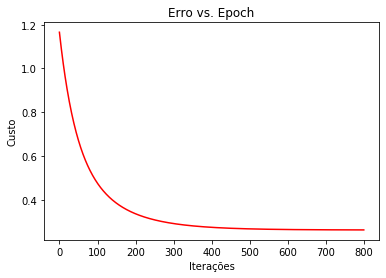

In [211]:
#plotando o custo
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch')

MOSTRANDO OS PESOS

In [212]:
w

array([[ 1.87041267e-04,  8.63646024e-01, -3.20565470e-02]])

PREDIÇÃO - DESAFIO PARA REALIZAR UMA REGRESSÃO USANDO MÚLTIPLAS VARIÁVEIS:
- Receber novos valores para [[size, bedroom]]
- Pré-processar usando a média e desvio padrão do conjunto original
- Realizar a regressão no modelo X@w.T
- Despadronizar o valor da predição obtendo o valor final da regressão

DEFININDO O MODELO DE PREDIÇÃO (HIPÓTESE) 

In [213]:
df_test = pd.read_csv('new-prices.csv')

In [214]:
df_test

,size,bedroom
0,2504,3
1,852,2
2,1852,4
3,1203,3
4,1215,4


In [221]:
x_df = df[['size','bedroom']]
df_test_norm = (df_test - x_df.mean()) / x_df.std()

In [222]:
df_test_norm

,size,bedroom
0,0.633343,-0.223675
1,-1.445423,-1.537767
2,-0.187090,1.090417
3,-1.003748,-0.223675
4,-0.988648,1.090417


In [223]:
X_new = np.array(df_test_norm)
X_new = insert_ones(X_new)
X_new

array([[ 1.        ,  0.63334297, -0.22367519],
       [ 1.        , -1.44542274, -1.53776691],
       [ 1.        , -0.18708998,  1.09041654],
       [ 1.        , -1.00374794, -0.22367519],
       [ 1.        , -0.98864795,  1.09041654]])

In [224]:
y_pred = X_new@w.T
y_pred

array([[ 0.55434143],
       [-1.19885106],
       [-0.19634747],
       [-0.85952562],
       [-0.88860982]])

In [225]:
Y_df = df['price']
Y_df

0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: price, dtype: int64

In [226]:
y_ok = y_pred*Y_df.std()+Y_df.mean()

In [227]:
y_ok

array([[409727.45670746],
       [190508.44331333],
       [315861.39177433],
       [232937.66204437],
       [229300.97732361]])